##Importing Libraries:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

##Loading Data:

In [ ]:
data_address = r'Train.csv' #Pass address of data set here
dfr = pd.read_csv(data_address)

##Data Cleaning:

It is recommended to modify this code for every project after making a copy of this code. This is just a sample.

In [ ]:
dfr.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,50,1,1,6.0,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,NaN,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,49,0,1,9.0,type0,4.0,1,NaN,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,34,0,2,5.0,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [ ]:
dfr.tail()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162
6999,EID_1640,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,74,0,4,5.0,type2,3.0,3,-0.1048,-1.6150,3.0,4,5,3,0.0910


In [ ]:
dfr['Hometown'].value_counts()

Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64

In [ ]:
dfr['Gender'] = dfr['Gender'].apply(lambda x: 0 if x=='M' else 1)
dfr['Relationship_Status'] = dfr['Relationship_Status'].apply(lambda x: 0 if x=='Single' else 1)
dfr = dfr.drop(columns=['Employee_ID'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


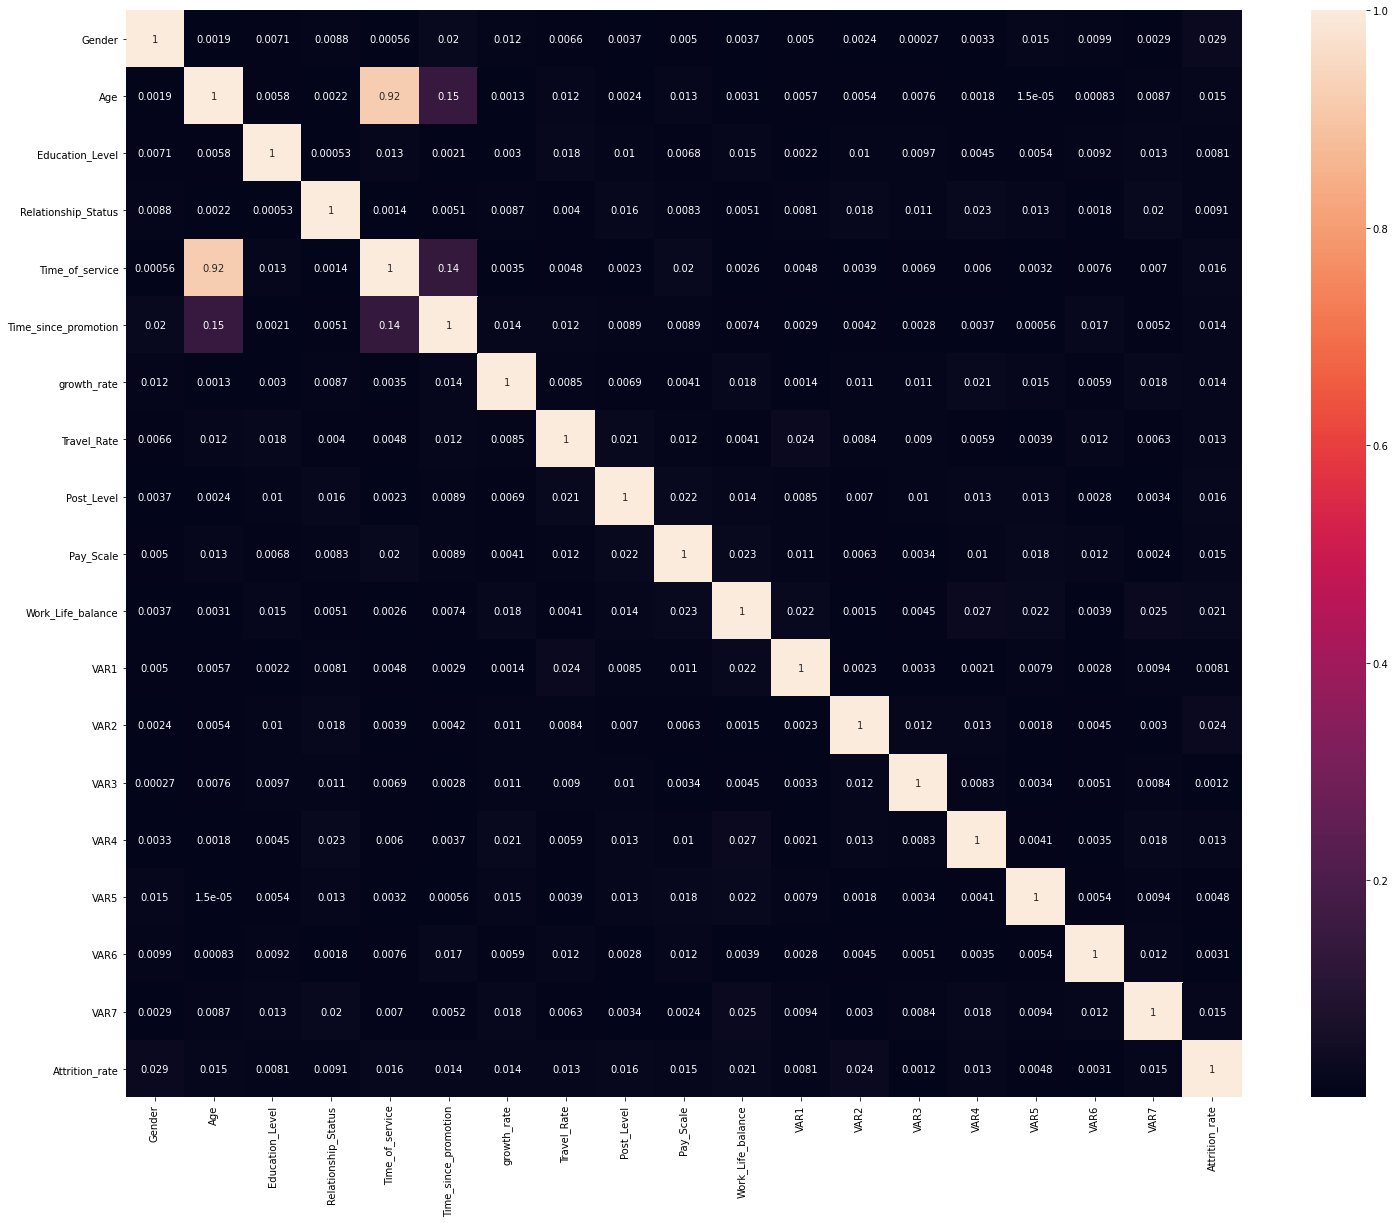

In [ ]:
import seaborn as sns
corrMatrix = dfr.corr()
corrMatrix = corrMatrix.apply(lambda x: abs(x))
plt.figure(figsize=(25,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
dfr['Unit'].value_counts()

IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: Unit, dtype: int64

In [ ]:
dummy = pd.get_dummies(dfr['Unit'])
dfr = dfr.join(dummy)

dummy = pd.get_dummies(dfr['Decision_skill_possess'])
dfr = dfr.join(dummy)

dummy = pd.get_dummies(dfr['Hometown'])
dfr = dfr.join(dummy)

dummy = pd.get_dummies(dfr['Compensation_and_Benefits'])
dfr = dfr.join(dummy)
dfr = dfr.drop(columns = ['Unit', 'Decision_skill_possess', 'Hometown', 'Compensation_and_Benefits'])

In [ ]:
dfr.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,Clinton,Franklin,Lebanon,Springfield,Washington,type0,type1,type2,type3,type4
0,1,42.0,4,1,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,0,24.0,3,0,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,58.0,3,1,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,1,26.0,3,0,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,1,31.0,1,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
dfr.describe()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,Clinton,Franklin,Lebanon,Springfield,Washington,type0,type1,type2,type3,type4
count,7000.000000,6588.000000,7000.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.587714,39.622799,3.187857,0.645714,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376,0.070857,0.049143,0.199143,0.167571,0.030286,0.100857,0.030143,0.072000,0.027571,0.097143,0.134714,0.020571,0.250714,0.248000,0.250857,0.250429,0.080714,0.217571,0.295714,0.248000,0.158000,0.026714,0.019000,0.563571,0.340286,0.050429
std,0.492281,13.606920,1.065102,0.478330,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753,0.256604,0.216182,0.399384,0.373512,0.171385,0.301161,0.170993,0.258506,0.163753,0.296173,0.341443,0.141955,0.433455,0.431883,0.433537,0.433291,0.272415,0.412624,0.456396,0.431883,0.364767,0.161259,0.136534,0.495978,0.473839,0.218843
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,3.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,37.000000,3.000000,1.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,52.000000,4.000000,1.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,65.000000,5.000000,1.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
nan_col = ['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']
for i in nan_col:
  dfr[i] = dfr[i].fillna(np.mean(dfr[i]))
dfr.describe()  

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,Clinton,Franklin,Lebanon,Springfield,Washington,type0,type1,type2,type3,type4
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.587714,39.622799,3.187857,0.645714,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376,0.070857,0.049143,0.199143,0.167571,0.030286,0.100857,0.030143,0.072000,0.027571,0.097143,0.134714,0.020571,0.250714,0.248000,0.250857,0.250429,0.080714,0.217571,0.295714,0.248000,0.158000,0.026714,0.019000,0.563571,0.340286,0.050429
std,0.492281,13.200357,1.065102,0.478330,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,1.121904,0.836377,0.948171,0.986933,0.503983,0.938945,1.164262,0.925319,0.185753,0.256604,0.216182,0.399384,0.373512,0.171385,0.301161,0.170993,0.258506,0.163753,0.296173,0.341443,0.141955,0.433455,0.431883,0.433537,0.433291,0.272415,0.412624,0.456396,0.431883,0.364767,0.161259,0.136534,0.495978,0.473839,0.218843
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,3.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,1.891078,2.000000,6.000000,3.000000,0.070400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,39.622799,3.000000,1.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.008126,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,51.000000,4.000000,1.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,65.000000,5.000000,1.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Filter columns according to corelation matrix
# dfr = dfr[['Gender', 'Work_Life_balance', 'VAR2', 'Attrition_rate']]

##Applying ML Models:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
models = ['Linear Regression', 'Polynomial Regression', 'XgBoost', 'AdaBoost', 'Lasso', 'Elastic Net', 'Ridge', 'RidgeCV', 'SGDRegressor', 'ARDRegression', 'HuberRegressor', 'TheilSenRegressor']
MSE = []
r2 = []
MAS = []
Maxe = []

In [ ]:
def evaluate(truth, pred):
  MSE.append(mean_squared_error(truth, pred))
  r2.append(r2_score(truth, pred))
  MAS.append(mean_absolute_error(truth, pred))
  Maxe.append(max_error(truth, pred))

In [ ]:
x = dfr.drop(columns=['Attrition_rate'])
y = dfr['Attrition_rate']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [ ]:
LR = LinearRegression() #use np.polyfit for polynomial regression
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
d = 1 #set degree of curve fitting
coef = np.polyfit(X_train[:,0], y_train, d) #select column with maximum correlation for best results
def curvefit(x):
  y = 0
  for j in range(d):
    y += (x**(d-j))*coef[j] #find pattern and put in loop
  return y

y_pred = [curvefit(int(i)) for i in X_test[:,0]]
evaluate(y_test, y_pred)

In [ ]:
xgb_model = xgb.XGBRegressor(eta=0.01, objective = 'reg:squarederror') #Change objective accordingly
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
abr = AdaBoostRegressor(n_estimators=100, learning_rate=0.01, loss='square', random_state=None) #Change accordingly
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
Lasso = Lasso()
Lasso.fit(X_train, y_train)
y_pred = Lasso.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
r = Ridge()
r.fit(X_train, y_train)
y_pred = r.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
rCV = RidgeCV()
rCV.fit(X_train, y_train)
y_pred = rCV.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
sgdr = SGDRegressor(loss='huber') #The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
sgdr.fit(X_train, y_train)
y_pred = sgdr.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
ardr = ARDRegression(n_iter = 1)
ardr.fit(X_train, y_train)
y_pred = ardr.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
hub = HuberRegressor(epsilon = 1.35, max_iter = 300)  #Epsilon min = 1, default = 1.35. The smaller the epsilon, the more robust it is to outliers.
hub.fit(X_train, y_train)
y_pred = hub.predict(X_test)
evaluate(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
theil = TheilSenRegressor()
theil.fit(X_train, y_train)
y_pred = theil.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
Final = {'Model': models, 'Mean Square Error': MSE, 'R2 score': r2, 'Mean Absolute Error' : MAS, 'Max Error': Maxe}
Final = pd.DataFrame(data=Final)
Final

,Model,Mean Square Error,R2 score,Mean Absolute Error,Max Error
0,Linear Regression,0.037964,-0.007838,0.132957,0.848505
1,Polynomial Regression,0.075320,-0.999548,0.194039,0.995900
2,XgBoost,0.038348,-0.018034,0.133672,0.824087
3,AdaBoost,0.038100,-0.011456,0.141545,0.790216
4,Lasso,0.037702,-0.000902,0.132141,0.807690
5,Elastic Net,0.037702,-0.000902,0.132141,0.807690
6,Ridge,0.037679,-0.000276,0.132164,0.820194
7,RidgeCV,0.037676,-0.000216,0.132090,0.811015
8,SGDRegressor,0.039939,-0.060291,0.125649,0.848452
9,ARDRegression,0.037822,-0.004085,0.132490,0.834684
